In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
all_file=os.listdir('./')
file=[]
for each_file in all_file:
    try:
        if  each_file.split('.')[1]=='csv':
            file.append(each_file)
    except: continue
file

['54.csv',
 '43.csv',
 '57.csv',
 '5.csv',
 '4.csv',
 '42.csv',
 '46.csv',
 '52.csv',
 '1.csv',
 '53.csv',
 '47.csv',
 '51.csv',
 '3.csv',
 '45.csv',
 '44.csv',
 '50.csv',
 '2.csv',
 '23.csv',
 '36.csv',
 '20.csv',
 '34.csv',
 '35.csv',
 '25.csv',
 '31.csv',
 '19.csv',
 '18.csv',
 '24.csv',
 '32.csv',
 '33.csv',
 '16.csv',
 '17.csv',
 '15.csv',
 '14.csv',
 '10.csv',
 '9.csv',
 '8.csv',
 '58.csv',
 '59.csv']

In [3]:
df=None
for f in file:

    data=pd.read_csv(f)
    if df is None:
        df=data
    else:
        df=pd.concat([df,data])
# df=df.drop('Unnamed: 0',axis=1)
df

,date,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,working,shopping
0,01:04:2013,57600.0,3600.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,NaN,NaN,NaN
1,01:05:2013,82801.0,0.0,1199.0,0.0,0.0,2.0,0.0,0.0,54.0,NaN,NaN,NaN
2,02:04:2013,151009.0,0.0,0.0,3600.0,0.0,1.0,0.0,0.0,54.0,NaN,NaN,NaN
3,02:05:2013,92145.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,54.0,1.000000,NaN,NaN
4,03:04:2013,12000.0,3600.0,0.0,0.0,0.0,2.0,0.0,0.0,54.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,29:03:2013,174000.0,4800.0,0.0,0.0,0.0,4.0,0.0,0.0,59.0,3.800000,0.0,NaN
54,29:04:2013,94828.0,0.0,1201.0,0.0,0.0,0.0,0.0,0.0,59.0,1.571429,0.0,NaN
55,29:05:2013,64201.0,0.0,0.0,1266.0,0.0,2.0,0.0,0.0,59.0,2.000000,0.0,NaN
56,30:04:2013,3599.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0,2.666667,0.0,NaN


In [4]:
# df=df.drop('Unnamed: 0',axis=1)
df.describe()

,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,working,shopping
count,2.031000e+03,2031.000000,2031.000000,1963.000000,1909.000000,2031.000000,2031.000000,2031.000000,2031.000000,883.000000,1300.000000,858.000000
mean,7.097842e+04,8169.875431,3462.949286,4282.776872,4311.299109,2.053176,0.330379,3388.183161,29.756770,2.131301,8118.425385,1003.696970
std,6.543258e+04,27125.343686,16952.329688,14073.531784,23836.924124,1.942303,0.470465,4205.124507,18.542082,1.161119,26219.545030,8582.119141
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.720000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000
50%,6.817400e+04,1200.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,31.000000,2.000000,0.000000,0.000000
75%,8.426250e+04,5996.500000,0.000000,4200.000000,0.000000,4.000000,1.000000,6900.000000,46.000000,3.000000,1200.000000,0.000000
max,1.119834e+06,532875.000000,369876.000000,425628.000000,533364.000000,5.000000,1.000000,14400.000000,59.000000,5.000000,517676.000000,136800.000000


In [5]:
def offset(data):
    try:
        if float(data)>86400:
            return 0
        return data
    except:
        return data
def to_min(time):
    try:
        return int(time/60)
    except: return time
    
time_type='%d:%m:%Y'
week=[]
def transform_week(time):
        time=datetime.strptime(time,time_type)
        return datetime.strftime(time,'%W')
for date in df.date.values:
    week.append(transform_week(date))
df['week']=week
for col in [ 'home_time', 'school_time', 'travel_time',
            'recreational_activities', 'orthers','working', 'shopping']:
    df[col]=df[col].apply(lambda x: offset(x))
    df[col]=df[col].fillna(0)

for col in [ 'home_time', 'school_time', 'travel_time',
            'recreational_activities', 'orthers','working', 'shopping']:
    df[col]=df[col].apply(lambda x: to_min(x))
df['date_in_week']=df['date_in_week'].values+1
df['None_school_time']=1440-df.school_time-df.home_time
df

,date,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,working,shopping,week,None_school_time
0,01:04:2013,960,60,0,0,0,1.0,0.0,0.0,54.0,NaN,0,0,13,420
1,01:05:2013,1380,0,19,0,0,3.0,0.0,0.0,54.0,NaN,0,0,17,60
2,02:04:2013,0,0,0,60,0,2.0,0.0,0.0,54.0,NaN,0,0,13,1440
3,02:05:2013,0,0,0,0,0,4.0,0.0,0.0,54.0,1.000000,0,0,17,1440
4,03:04:2013,200,60,0,0,0,3.0,0.0,0.0,54.0,NaN,0,0,13,1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,29:03:2013,0,80,0,0,0,5.0,0.0,0.0,59.0,3.800000,0,0,12,1360
54,29:04:2013,0,0,20,0,0,1.0,0.0,0.0,59.0,1.571429,0,0,17,1440
55,29:05:2013,1070,0,0,21,0,3.0,0.0,0.0,59.0,2.000000,0,0,21,370
56,30:04:2013,59,0,0,0,0,2.0,0.0,0.0,59.0,2.666667,0,0,17,1381


In [6]:
from bioinfokit.analys import stat
ANOVA=None
for col in df.columns:
    if col not in ['date','level','volunteer']:
        res = stat()
        res.anova_stat(df=df, res_var='level'
                             , anova_model=f"level ~ C({col})")
#         print(res.anova_summary.iloc[0,:])
        if ANOVA is None:
            ANOVA=res.anova_summary
        else:
            ANOVA=pd.concat([ANOVA,res.anova_summary])

/Users/khangphan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 459, but rank is 263
  warnings.warn('covariance of constraints does not have full '
/Users/khangphan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 193, but rank is 127
  warnings.warn('covariance of constraints does not have full '
/Users/khangphan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 133, but rank is 79
  warnings.warn('covariance of constraints does not have full '
/Users/khangphan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 158, but rank is 7

In [7]:
ANOVA=ANOVA.drop('Residual')

In [8]:
ANOVA['PR(>F)']=ANOVA['PR(>F)']*100

In [9]:
ANOVA['PR(>F)']=ANOVA['PR(>F)'].astype(int)
ANOVA=ANOVA.rename(columns={'PR(>F)':'p_value(%)'})
ANOVA

,df,sum_sq,mean_sq,F,p_value(%)
C(home_time),459.0,607.383679,1.323276,0.973867,59
C(school_time),193.0,292.788786,1.517040,1.149451,14
C(travel_time),133.0,165.087838,1.241262,0.913554,68
C(recreational_activities),158.0,190.512945,1.205778,0.886168,73
C(orthers),113.0,179.016580,1.584218,1.190550,15
C(date_in_week),6.0,12.462642,2.077107,1.546382,15
C(cut_class),1.0,1.377527,1.377527,1.021781,31
C(class_schedule),14.0,22.674770,1.619626,1.205242,26
C(working),151.0,203.714177,1.349101,1.000746,48
C(shopping),28.0,38.211038,1.364680,1.012440,43


In [10]:
import dataframe_image as dfi
dfi.export(ANOVA ,'../ANOVA_table_final_data_no_filter.png')

In [11]:
df

,date,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,working,shopping,week,None_school_time
0,01:04:2013,960,60,0,0,0,1.0,0.0,0.0,54.0,NaN,0,0,13,420
1,01:05:2013,1380,0,19,0,0,3.0,0.0,0.0,54.0,NaN,0,0,17,60
2,02:04:2013,0,0,0,60,0,2.0,0.0,0.0,54.0,NaN,0,0,13,1440
3,02:05:2013,0,0,0,0,0,4.0,0.0,0.0,54.0,1.000000,0,0,17,1440
4,03:04:2013,200,60,0,0,0,3.0,0.0,0.0,54.0,NaN,0,0,13,1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,29:03:2013,0,80,0,0,0,5.0,0.0,0.0,59.0,3.800000,0,0,12,1360
54,29:04:2013,0,0,20,0,0,1.0,0.0,0.0,59.0,1.571429,0,0,17,1440
55,29:05:2013,1070,0,0,21,0,3.0,0.0,0.0,59.0,2.000000,0,0,21,370
56,30:04:2013,59,0,0,0,0,2.0,0.0,0.0,59.0,2.666667,0,0,17,1381


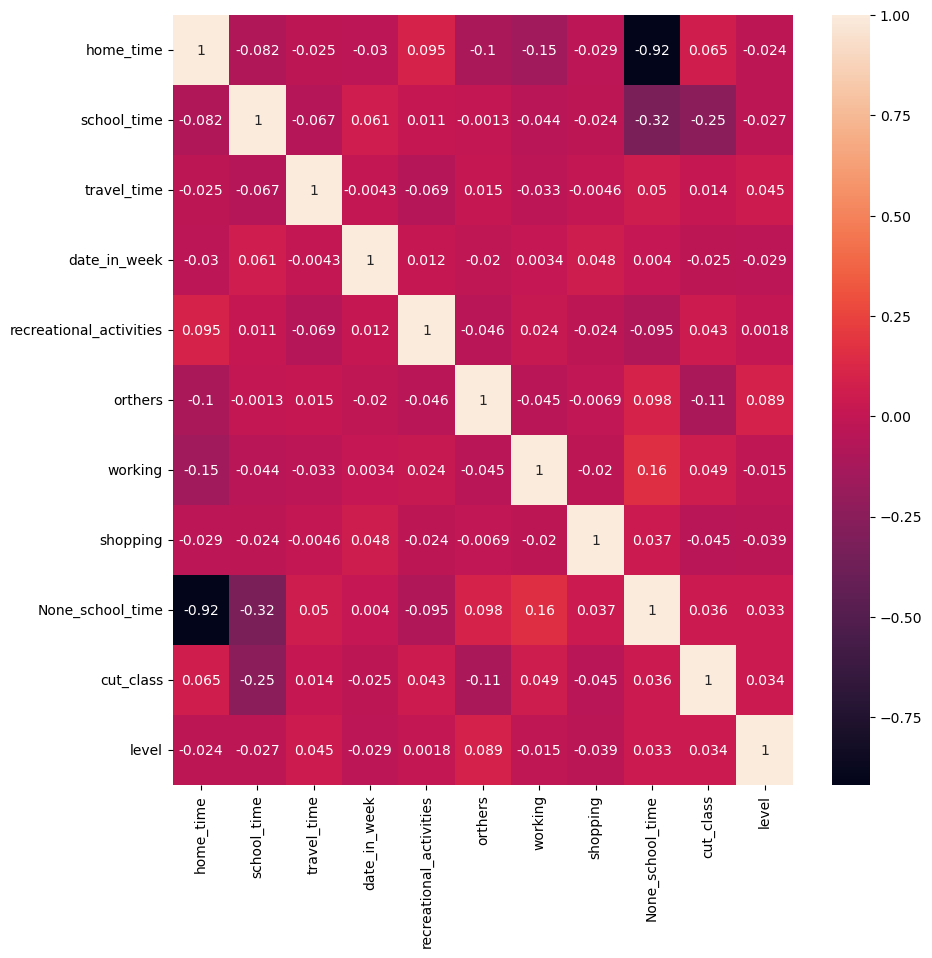

In [12]:
corr=df[[ 'home_time', 'school_time', 'travel_time', 'date_in_week',
        'recreational_activities', 'orthers',
       'working', 'shopping','None_school_time','cut_class','level']].corr()
ax,fig=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.savefig('../image/corr.png')

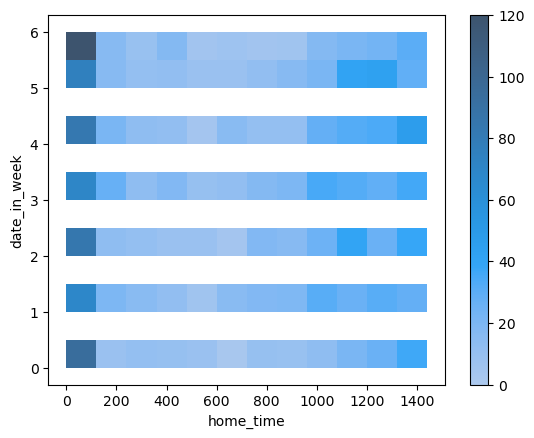

In [13]:
sns.histplot(df,x='home_time',y='date_in_week',cbar=True)
plt.savefig('../image/hometime vs day.png')

In [14]:
df

,date,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,working,shopping,week,None_school_time
0,01:04:2013,960,60,0,0,0,1.0,0.0,0.0,54.0,NaN,0,0,13,420
1,01:05:2013,1380,0,19,0,0,3.0,0.0,0.0,54.0,NaN,0,0,17,60
2,02:04:2013,0,0,0,60,0,2.0,0.0,0.0,54.0,NaN,0,0,13,1440
3,02:05:2013,0,0,0,0,0,4.0,0.0,0.0,54.0,1.000000,0,0,17,1440
4,03:04:2013,200,60,0,0,0,3.0,0.0,0.0,54.0,NaN,0,0,13,1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,29:03:2013,0,80,0,0,0,5.0,0.0,0.0,59.0,3.800000,0,0,12,1360
54,29:04:2013,0,0,20,0,0,1.0,0.0,0.0,59.0,1.571429,0,0,17,1440
55,29:05:2013,1070,0,0,21,0,3.0,0.0,0.0,59.0,2.000000,0,0,21,370
56,30:04:2013,59,0,0,0,0,2.0,0.0,0.0,59.0,2.666667,0,0,17,1381


In [15]:
df=df.sort_values(['week','date'])
df=df.reset_index(drop=True)
# df=df.drop('date.1',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     2031 non-null   object 
 1   home_time                2031 non-null   int64  
 2   school_time              2031 non-null   int64  
 3   travel_time              2031 non-null   int64  
 4   recreational_activities  2031 non-null   int64  
 5   orthers                  2031 non-null   int64  
 6   date_in_week             2031 non-null   float64
 7   cut_class                2031 non-null   float64
 8   class_schedule           2031 non-null   float64
 9   volunteer                2031 non-null   float64
 10  level                    883 non-null    float64
 11  working                  2031 non-null   int64  
 12  shopping                 2031 non-null   int64  
 13  week                     2031 non-null   object 
 14  None_school_time        

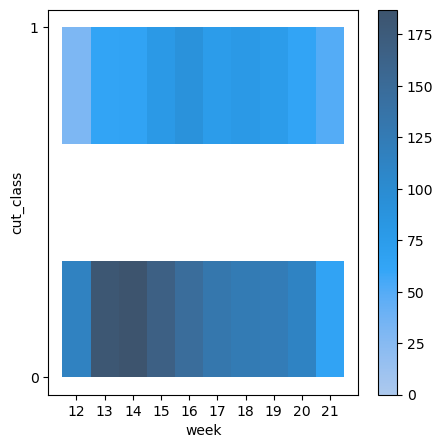

In [16]:
ax,fig=plt.subplots(figsize=(5,5))
sns.histplot(df,x='week',y='cut_class',cbar=True,bins=3)
plt.yticks([0,1])
plt.savefig('../image/cutclass vs week.png')

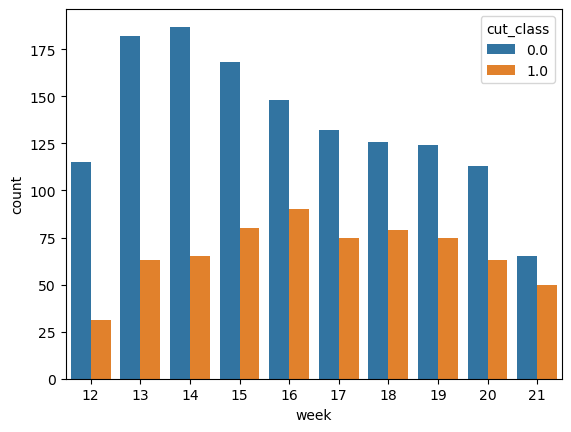

In [17]:
sns.countplot(df,x='week',hue='cut_class')
plt.savefig('../image/count cutclass vs week.png')

In [18]:
print(df['level'].unique())
df_stress=df.iloc[:,1:]
df_stress['level']=df_stress['level'].fillna(df_stress['level'].median())
# df_stress['level']=df_stress['level'].fillna(0)


[       nan 1.         4.         2.75       1.8        4.5
 4.33333333 2.5        3.33333333 2.         1.85714286 1.5
 1.4        3.         3.8        5.         1.75       3.375
 2.8        1.875      1.71428571 1.66666667 2.33333333 4.25
 1.33333333 3.55555556 3.5        1.16666667 1.61538462 2.2
 3.6        1.25       3.25       2.66666667 2.28571429 2.16666667
 1.22222222 1.57142857]


[       nan 1.         4.         2.75       1.8        4.5
 4.33333333 2.5        3.33333333 2.         1.85714286 1.5
 1.4        3.         3.8        5.         1.75       3.375
 2.8        1.875      1.71428571 1.66666667 2.33333333 4.25
 1.33333333 3.55555556 3.5        1.16666667 1.61538462 2.2
 3.6        1.25       3.25       2.66666667 2.28571429 2.16666667
 1.22222222 1.57142857]


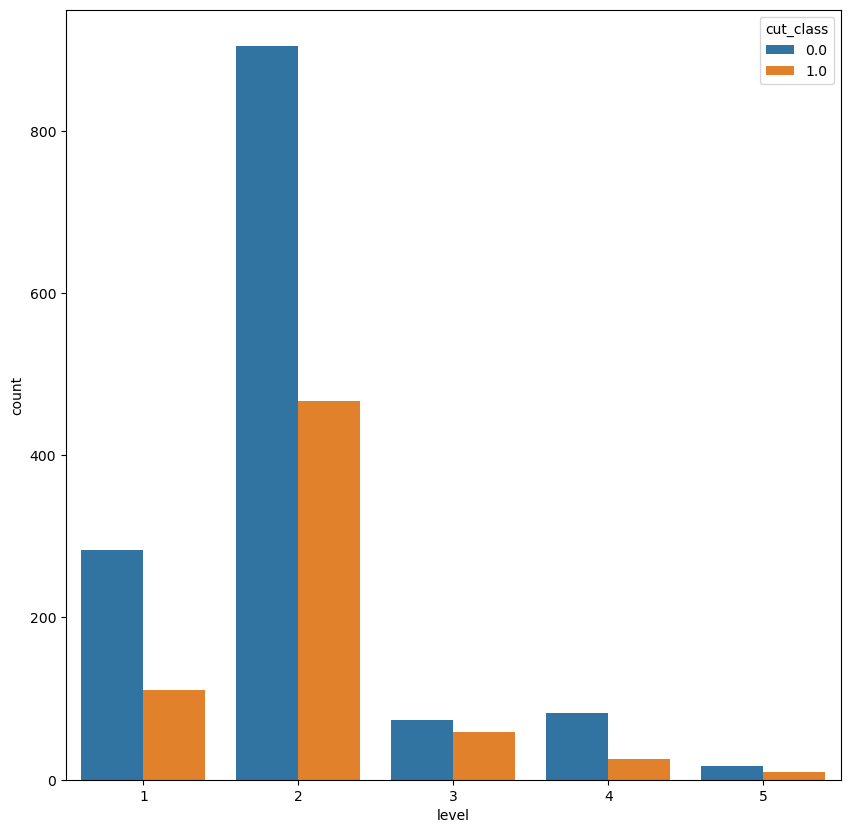

In [19]:
df_stress['level']=df_stress['level'].astype(int)
ax,fig=plt.subplots(figsize=(10,10))
sns.countplot(df_stress,x='level',hue='cut_class')
plt.xticks(rotation=0)
plt.savefig('../image/stress vs cutclass.png')
print(df['level'].unique())

In [20]:
df_stress

,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,working,shopping,week,None_school_time
0,931,0,0,0,0,3.0,0.0,0.0,54.0,2,0,0,12,509
1,720,79,0,0,0,3.0,0.0,0.0,57.0,2,0,0,12,641
2,559,180,0,40,0,3.0,0.0,3900.0,5.0,2,0,0,12,701
3,119,39,0,0,0,3.0,1.0,7800.0,4.0,1,0,0,12,1282
4,0,0,0,0,0,3.0,1.0,10500.0,42.0,2,0,0,12,1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,1254,19,0,0,0,5.0,1.0,9000.0,23.0,2,0,0,21,167
2027,0,0,0,0,0,5.0,1.0,6000.0,36.0,2,0,0,21,1440
2028,160,0,0,0,0,5.0,1.0,9000.0,20.0,2,0,0,21,1280
2029,1000,20,240,80,0,5.0,0.0,0.0,31.0,2,0,0,21,420


In [21]:
stress_cut_classes=df_stress[df_stress['cut_class']==1]['level']
stress_no_cut_classes=df_stress[df_stress['cut_class']==0]['level']

from scipy.stats import f_oneway
f_oneway(stress_no_cut_classes,stress_cut_classes)

F_onewayResult(statistic=1.1482358535296167, pvalue=0.2840461912845573)

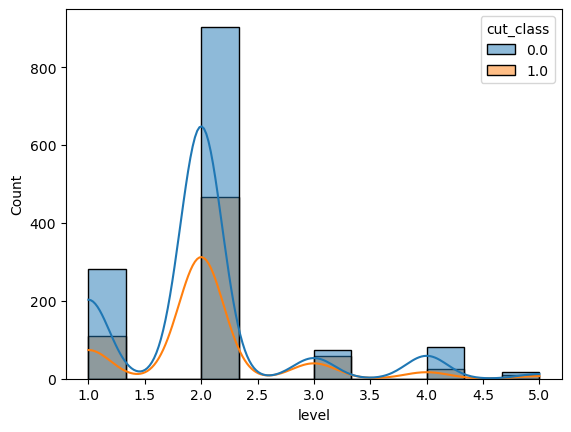

In [22]:
sns.histplot(df_stress,x='level',hue='cut_class',kde=True)
plt.savefig('../image/stress by cut class.png')

In [23]:
no_cut_class_data=df_stress[df_stress['cut_class']==0]
cut_class_data=df_stress[df_stress['cut_class']==1]
no_cut_class_data=no_cut_class_data['level'].value_counts().to_frame()
no_cut_class_data['count']=no_cut_class_data['count']/(no_cut_class_data['count'].sum())
no_cut_class_data
cut_class_data=cut_class_data['level'].value_counts().to_frame()
cut_class_data['count']=cut_class_data['count']/cut_class_data['count'].sum()
cut_class_data

,count
level,
2,0.695976
1,0.163934
3,0.087928
4,0.037258
5,0.014903


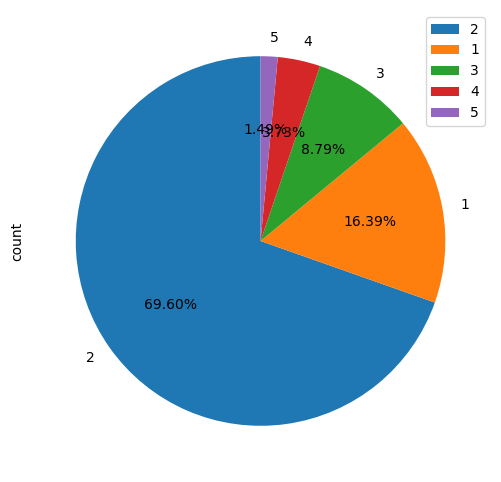

In [24]:
cut_class_data.plot.pie(subplots=True, figsize=(11, 6),startangle=90,autopct='%1.2f%%')
plt.savefig('../image/stress ratio cut class.png')

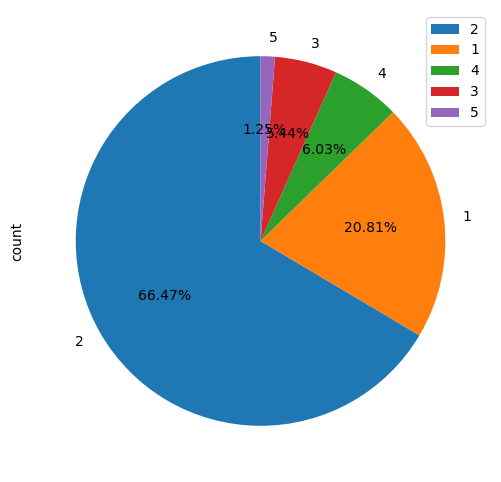

In [25]:
no_cut_class_data.plot.pie(subplots=True, figsize=(11, 6),startangle=90,autopct='%1.2f%%')
plt.savefig('../image/stress ratio no cut class.png')

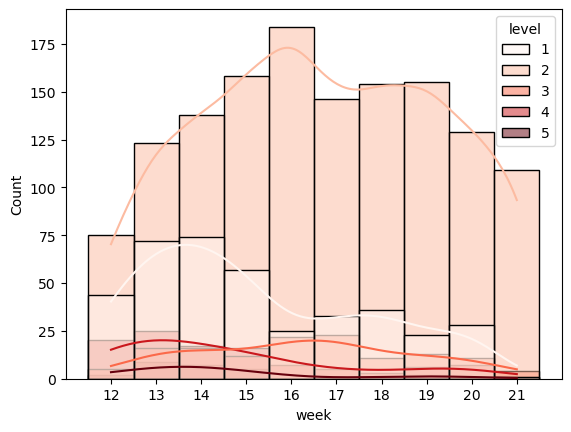

In [26]:
sns.histplot(df_stress,x='week',hue='level',kde=True,palette='Reds')
plt.savefig('../image/stress by week.png')

In [27]:
df_stress_fix=df_stress
df_stress_fix['school_time']=(df_stress_fix['school_time']/60).astype(int)



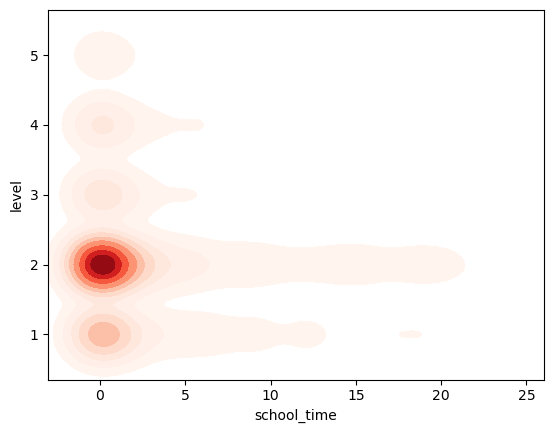

In [28]:
sns.kdeplot(df_stress_fix,x='school_time',y='level',cmap='Reds',fill=True)
plt.savefig('../image/stress by school time.png')

In [29]:
df_stress_fix['None_school_time']=(df_stress_fix['None_school_time']/60).astype(int)

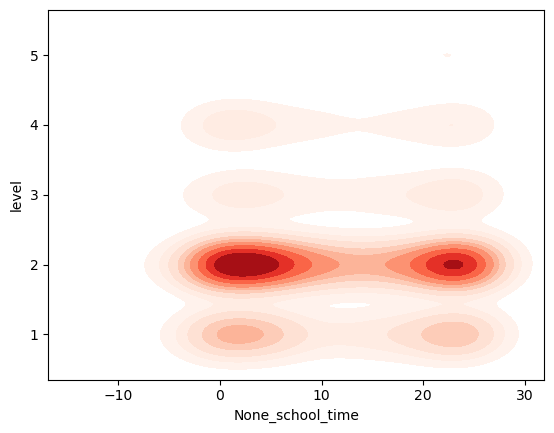

In [30]:
sns.kdeplot(df_stress_fix,x='None_school_time',y='level',cmap='Reds',fill=True)
plt.savefig('../image/stress by none school time.png')

In [31]:
df.info()
df_stress['week']=df_stress['week'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     2031 non-null   object 
 1   home_time                2031 non-null   int64  
 2   school_time              2031 non-null   int64  
 3   travel_time              2031 non-null   int64  
 4   recreational_activities  2031 non-null   int64  
 5   orthers                  2031 non-null   int64  
 6   date_in_week             2031 non-null   float64
 7   cut_class                2031 non-null   float64
 8   class_schedule           2031 non-null   float64
 9   volunteer                2031 non-null   float64
 10  level                    883 non-null    float64
 11  working                  2031 non-null   int64  
 12  shopping                 2031 non-null   int64  
 13  week                     2031 non-null   object 
 14  None_school_time        

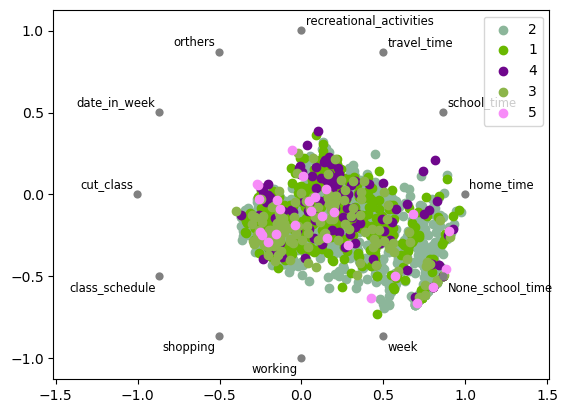

In [32]:
pd.plotting.radviz(df_stress[[ 'home_time', 'school_time', 'travel_time',
       'recreational_activities', 'orthers', 'date_in_week', 'cut_class',
       'class_schedule', 'level', 'shopping', 'working', 'week',
       'None_school_time']],'level')
plt.savefig('../image/radvix.png')

<Axes: xlabel='level', ylabel='count'>

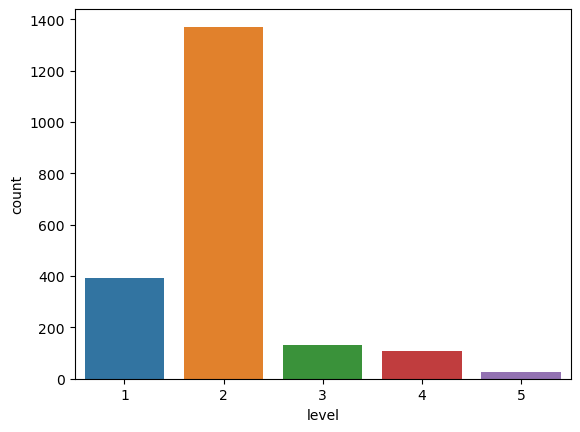

In [33]:
sns.countplot(df_stress,x='level')

In [34]:
df.describe()

,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,working,shopping,None_school_time
count,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,883.000000,2031.000000,2031.000000,2031.000000
mean,658.679961,101.504185,40.184146,60.464303,38.387986,3.053176,0.330379,3388.183161,29.756770,2.131301,70.125062,4.368784,679.815854
std,534.701849,221.589117,145.909688,129.322652,164.987058,1.942303,0.470465,4205.124507,18.542082,1.161119,226.784217,60.642491,561.810113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-544.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,160.000000
50%,730.000000,19.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,31.000000,2.000000,0.000000,0.000000,511.000000
75%,1160.000000,80.000000,0.000000,60.000000,0.000000,5.000000,1.000000,6900.000000,46.000000,3.000000,0.000000,0.000000,1321.000000
max,1440.000000,1420.000000,1420.000000,1381.000000,1439.000000,6.000000,1.000000,14400.000000,59.000000,5.000000,1402.000000,1380.000000,1440.000000


array([   0,   79,  180,   39,  100,   40,  780,  140,   20,  660,  519,
        119,   80,   59,  599,   60,  120,  540,  940,  179,  400,  160,
       1040,  379,  139,  839,  159,   99, 1160,   19,  200, 1300,  320,
        245, 1240,  210,  778,  161,  260,  300,   50,   58,  219,  220,
        199, 1200,  860, 1079,  440,  360, 1180,  480,  600,  259,  239,
        900,  451,   78,  340, 1120,  560,  309,   69,  378,  820,  734,
        591,   41,  204,  500,  240,  580, 1131, 1320,  620,  460, 1060,
        539, 1420,  960,  380, 1140,  640,  339,  398,  280, 1179,  359,
       1260,  740,  699,  979, 1220,   18,  118,   61,  171,  760,  581,
         81, 1280,  449,   64,  101,  639,  419,  141, 1000,   38,  541,
       1360, 1400,  299,  121, 1141,  198,   66,   37,  899,  373,  138,
        132,  218,  959,  356,  168,  538,  867, 1139,   21,  420,  135,
        361,   57,  918,    5,  720,  701,   24,   86,  187,   12,  238,
        208,   29,   89,  107,   10,  152,   68,  5

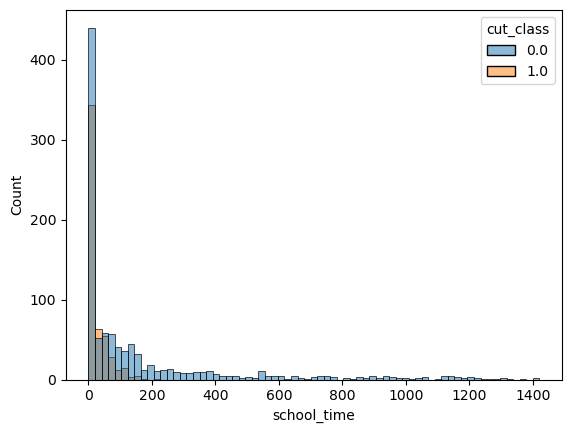

In [35]:
df=df.reset_index(drop=True)
df_new=df.drop(df[df['home_time']==0].index)

sns.histplot(df_new,x='school_time',hue='cut_class')

df_new.describe()
df['school_time'].unique()


In [36]:
df.school_time.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1        79
2       180
3        39
4         0
       ... 
2026     19
2027      0
2028      0
2029     20
2030      0
Name: school_time, Length: 2031, dtype: int64>

In [37]:
df.columns

Index(['date', 'home_time', 'school_time', 'travel_time',
       'recreational_activities', 'orthers', 'date_in_week', 'cut_class',
       'class_schedule', 'volunteer', 'level', 'working', 'shopping', 'week',
       'None_school_time'],
      dtype='object')

In [38]:
y=df['level']
y.unique()

array([       nan, 1.        , 4.        , 2.75      , 1.8       ,
       4.5       , 4.33333333, 2.5       , 3.33333333, 2.        ,
       1.85714286, 1.5       , 1.4       , 3.        , 3.8       ,
       5.        , 1.75      , 3.375     , 2.8       , 1.875     ,
       1.71428571, 1.66666667, 2.33333333, 4.25      , 1.33333333,
       3.55555556, 3.5       , 1.16666667, 1.61538462, 2.2       ,
       3.6       , 1.25      , 3.25      , 2.66666667, 2.28571429,
       2.16666667, 1.22222222, 1.57142857])

In [39]:
X=df[[ 'home_time', 'school_time', 'travel_time',
       'recreational_activities', 'orthers', 'date_in_week', 'cut_class',
       'class_schedule' ,  'shopping', 'working',
       'week', 'None_school_time']]
y=df['level']
y=y.fillna(y.median())
y=10*y
y=y.astype(int)
y.unique()

array([20, 10, 40, 27, 18, 45, 43, 25, 33, 15, 14, 30, 38, 50, 17, 28, 16,
       23, 42, 13, 35, 11, 22, 36, 12, 32, 26, 21])

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train, X_vad, y_train, y_vad = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_ML, X_vad_ML, y_train_ML, y_vad_ML= X_train, X_vad, y_train, y_vad

X_train = scaler.fit_transform(X_train)

X_vad = scaler.fit_transform(X_vad)
X.shape


(2031, 12)

In [41]:
y.unique()

array([20, 10, 40, 27, 18, 45, 43, 25, 33, 15, 14, 30, 38, 50, 17, 28, 16,
       23, 42, 13, 35, 11, 22, 36, 12, 32, 26, 21])

In [42]:
y.describe()

count    2031.000000
mean       20.555391
std         7.675420
min        10.000000
25%        20.000000
50%        20.000000
75%        20.000000
max        50.000000
Name: level, dtype: float64

In [43]:
# from xgboost import XGBClassifier#XGBcalssifier
# seed=200
# model=XGBClassifier (use_label_encoder=False, eval_metric='logloss', random_state=seed)
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for XBG is ',metrics.accuracy_score(prediction1,y_vad))

In [44]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import metrics #accuracy measure
from sklearn.linear_model import LogisticRegression #logistic regression

Accuracy for KN is  0.597051597051597


<Axes: >

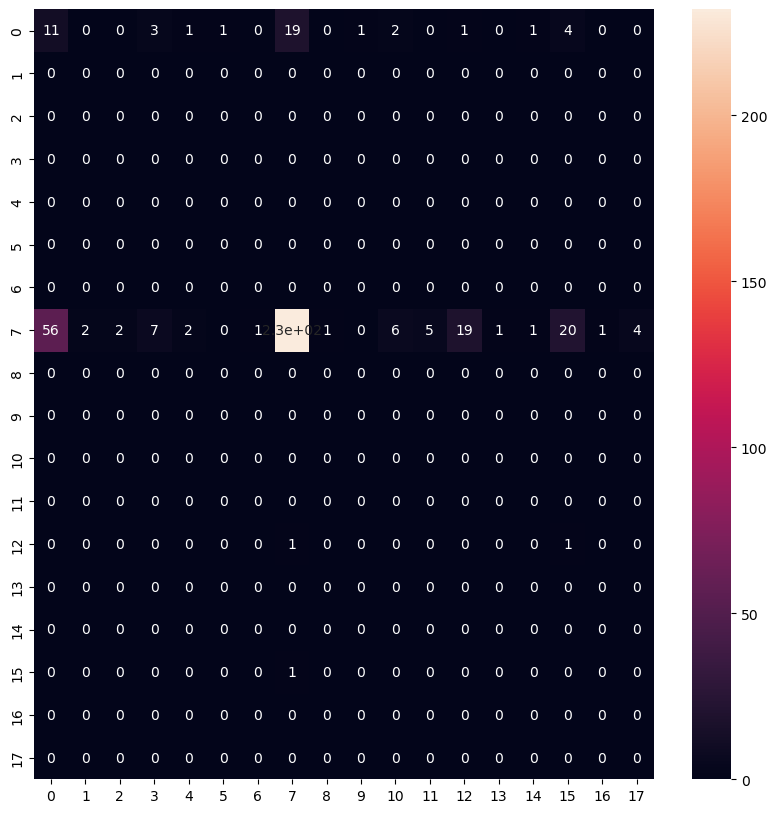

In [45]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
prediction1=model.predict(X_vad)
print('Accuracy for KN is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad)
sns.heatmap(conf,annot=True)

Accuracy for LR is  0.6240786240786241


/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

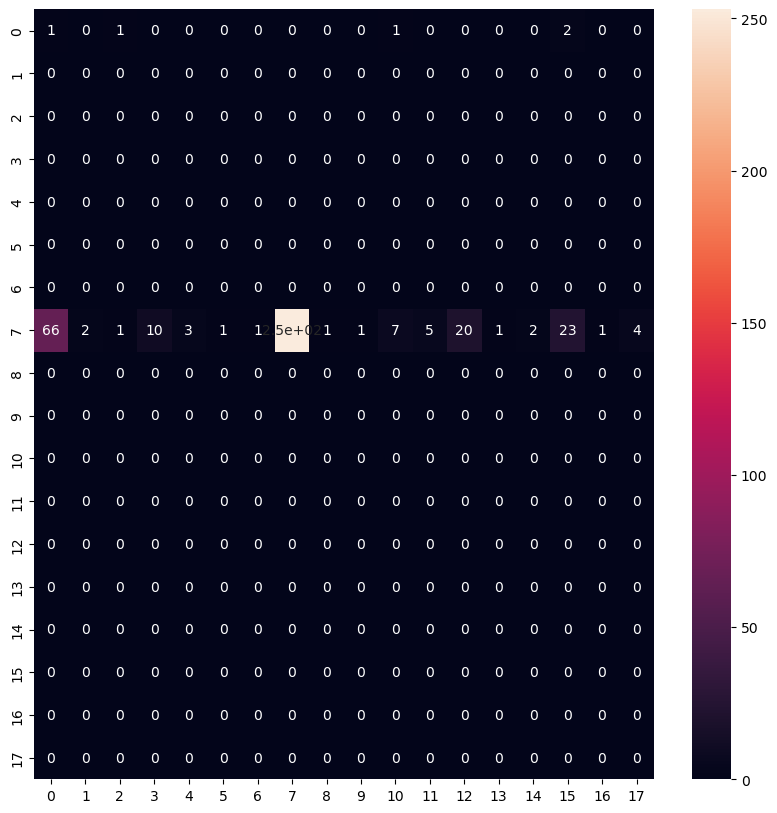

In [46]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction1=model.predict(X_vad)
print('Accuracy for LR is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad)
sns.heatmap(conf,annot=True)

Accuracy for SVM is  0.6216216216216216


<Axes: >

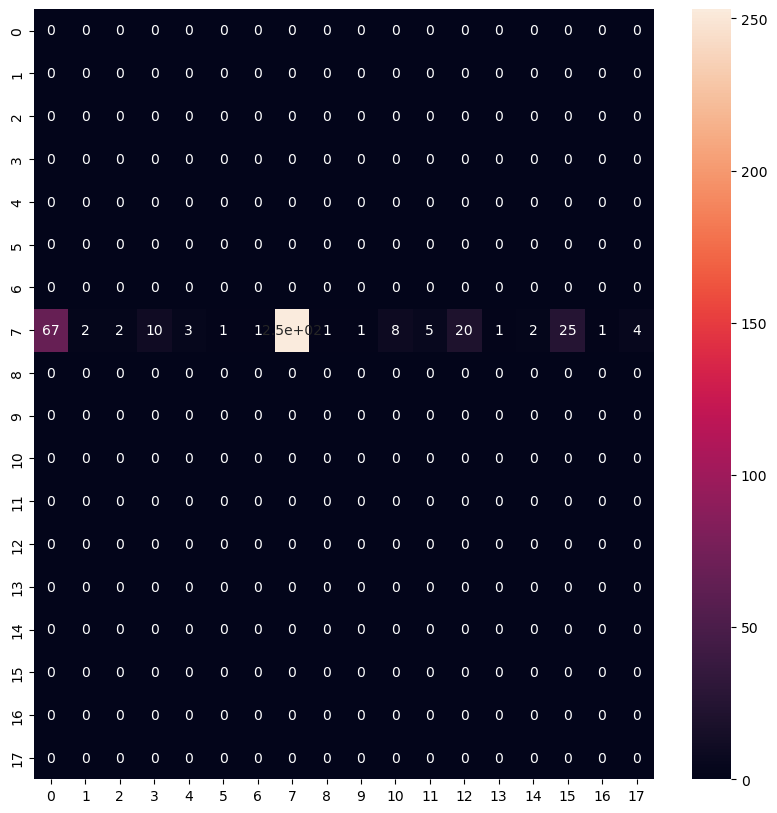

In [47]:
from sklearn import svm #support vector Machine
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_vad)
print('Accuracy for SVM is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad)
sns.heatmap(conf,annot=True)